In [19]:
from lvmtipo.actors import lvm

await lvm.sci.agc.start()
# we do also connect to the telscope for a status - position
await lvm.sci.pwi.start()
await lvm.sci.pwi.status()

await lvm.sci.foc.start()
await lvm.sci.foc.moveAbsolute(42)

{'Reachable': True,
 'AtHome': False,
 'Moving': False,
 'PositionSwitchStatus': 254,
 'Position': 42.0,
 'DeviceEncoder': {'Position': -166700.0, 'Unit': 'STEPS'},
 'Velocity': 0.0,
 'AtLimit': False}

east: /data/lvm/sci/agcam/east/20220819/lvm.sci.agcam.east_00000019.fits, west: /data/lvm/sci/agcam/west/20220819/lvm.sci.agcam.west_00000019.fits


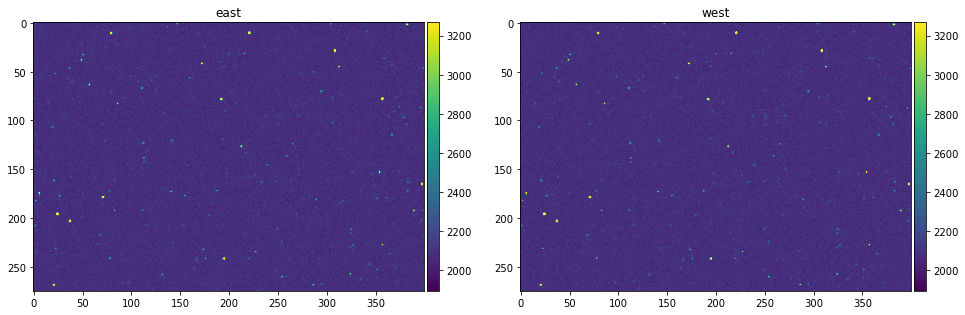

east: /data/lvm/sci/agcam/east/20220819/lvm.sci.agcam.east_00000020.fits, west: /data/lvm/sci/agcam/west/20220819/lvm.sci.agcam.west_00000020.fits


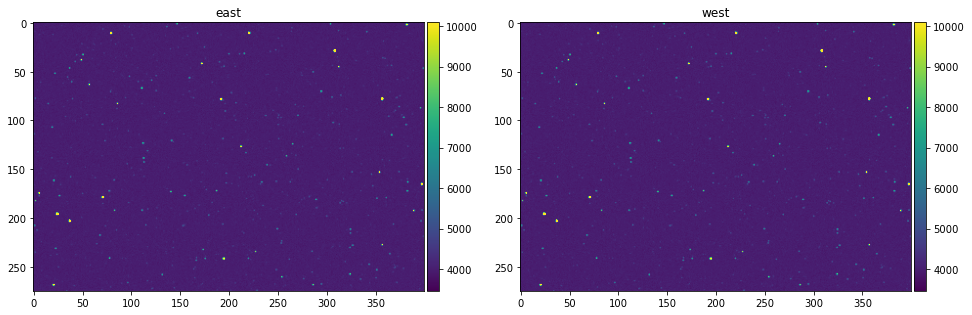

In [20]:
%matplotlib inline
from plotimg import plot_images, fits

for e in [1.,5.]:
    ef, wf = (await lvm.sci.agc.expose(e)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

In [ ]:
%matplotlib inline
from plotimg import plot_images, fits

from lvmtipo.actors import lvm
from lvmagp.focus import Focus
from logging import DEBUG, INFO

telsubsys = await lvm.from_string("sci").start()
focus = Focus(telsubsys, level = DEBUG)

await lvm.sci.pwi.status()

def img_cb(img_e, img_w):
   plot_images(img_e.data, img_w.data)

f_cal, f_err = await focus.fine(guess=44, count=2, step=4, exposure_time=10, callback=img_cb)

print(f"focus: {f_cal}, err: {f_err}")


In [ ]:
from plotimg import plot_images, fits

await lvm.sci.foc.moveAbsolute(f_cal)
ef, wf = (await lvm.sci.agc.expose(5)).flatten().unpack("east.filename", "west.filename") 
plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

In [ ]:
%matplotlib inline
from lvmtipo.actors import lvm
from plotimg import plot_image, fits

await lvm.spec.agc.start()

ef = (await lvm.spec.agc.expose(1.0)).flatten().unpack("east.filename")[0] 
print(f"east: {ef}")
plot_image(fits.getdata(ef, ext=0))

In [21]:

from lvmagp.images import Image
from lvmagp.images.processors.detection import DaophotSourceDetection, SepSourceDetection
from lvmagp.images.processors.astrometry import AstrometryDotNet

source_detection = SepSourceDetection()

rc = await lvm.sci.agc.expose(5)
print(rc)
ef, wf = rc.flatten().unpack("*.filename")
print(f"east: {ef}, west: {wf}")
ei = await source_detection(Image.from_file(ef))
wi = await source_detection(Image.from_file(wf))

ei.catalog




{'east': {'state': 'written', 'filename': '/data/lvm/sci/agcam/east/20220819/lvm.sci.agcam.east_00000021.fits'}, 'west': {'state': 'written', 'filename': '/data/lvm/sci/agcam/west/20220819/lvm.sci.agcam.west_00000021.fits'}}
east: /data/lvm/sci/agcam/east/20220819/lvm.sci.agcam.east_00000021.fits, west: /data/lvm/sci/agcam/west/20220819/lvm.sci.agcam.west_00000021.fits


x,y,peak,flux,fwhm,a,b,theta,ellipticity,tnpix,kronrad,fluxrad25,fluxrad50,fluxrad75,xwin,ywin
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
156.46810761317178,5.969012777738323,497.40771484375,1285.4336328125005,1.4874265771375426,0.7409708499908447,0.49892932176589966,90.0,0.3266545886763773,3,1.7715764132492602,0.5141193581395964,0.8393939794726238,1.6260550018740891,155.25836852132886,4.9541718340558445
72.07810130265938,7.380139362848151,943.16162109375,2501.931591796875,1.7546147453033325,0.8163726329803467,0.6662824153900146,90.0,0.18385013353815516,8,1.5114273321412053,0.4827686781616358,0.7706676122574176,1.0609010429669292,71.02644842408934,6.327132500244002
313.06878286815817,9.078114920392846,1439.14208984375,230.26273437500004,1.6959236539477567,0.7360575795173645,0.7039698958396912,90.0,0.04359398581115537,4,0.11134854081807488,0.13801079615950584,0.16101259551942348,0.18401439487934113,312.0086542164608,8.014660776049688
265.4246195556846,6.218652888353784,998.50830078125,4060.2135546874997,1.882465730040723,0.8464584350585938,0.7494127750396729,90.0,0.11464905540483294,4,2.486831543684008,0.6908794930433672,1.1779506777790016,3.5411761689172105,264.34441035381445,5.246897829193081
342.0592160689336,10.270102140991687,2463.45947265625,4381.046865234374,1.8047351599389498,0.8221685886383057,0.7062422633171082,90.0,0.14100067422083995,6,1.1355229727428462,0.36760734990230803,0.582707283829852,0.8383047389897113,341.00598196796085,9.087471010530928
168.9237702867638,11.922562296604724,1931.2900390625,3330.802753906251,1.721357874489479,0.7442631125450134,0.7174782752990723,90.0,0.0359883981813236,6,0.8725374728049955,0.3382246162282881,0.5375871550941305,0.9516307544702738,167.98288181364214,10.972029979388088
20.76265151167302,12.98469156738459,831.2548828125,1502.4005175781251,1.5588126574977585,0.6798604130744934,0.6435758471488953,90.0,0.053370611419350844,3,1.4339565519439552,0.40157456529496205,0.6044830363663745,0.8811810198240122,19.932681587570297,12.00315317043976
80.30846672265876,11.730979104897623,36981.50390625,78825.62477539062,2.0169066573264733,0.8588120937347412,0.8541844487190247,90.0,0.0053884255350808985,10,0.7704228008596179,0.471750950130365,0.7039865419819553,0.9436803823349839,79.14616743069898,10.881914658078378
192.90566309328455,13.516237457149563,447.28515625,1111.0618652343744,1.480860969150405,0.7356967926025391,0.49968937039375305,90.0,0.32079441501152395,4,1.5127546985325704,0.48794688862085217,0.7142228921658851,0.9124581995715078,191.90692034653821,12.51363482006968
